[ 5.        +0.j          0.26604444-0.22323779j  0.        +0.j
 -1.        -1.73205081j -1.43969262-0.52400526j -1.43969262+0.52400526j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]


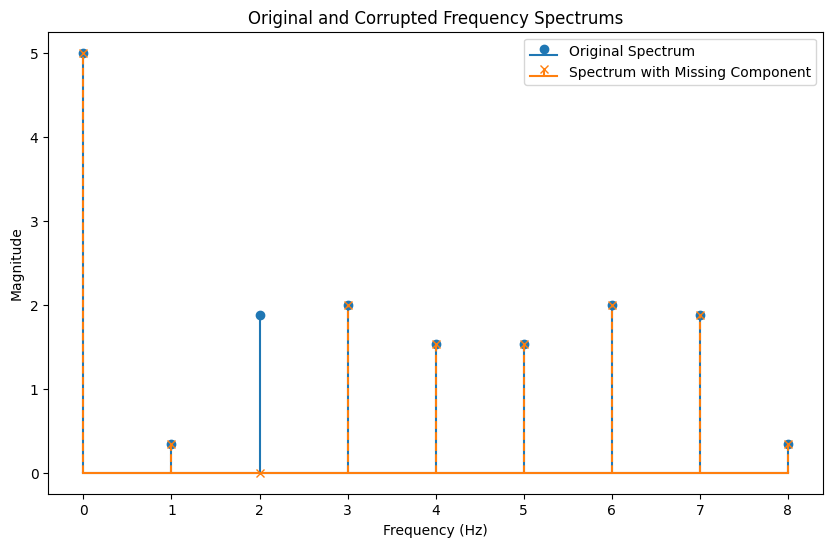

<Figure size 1000x600 with 0 Axes>

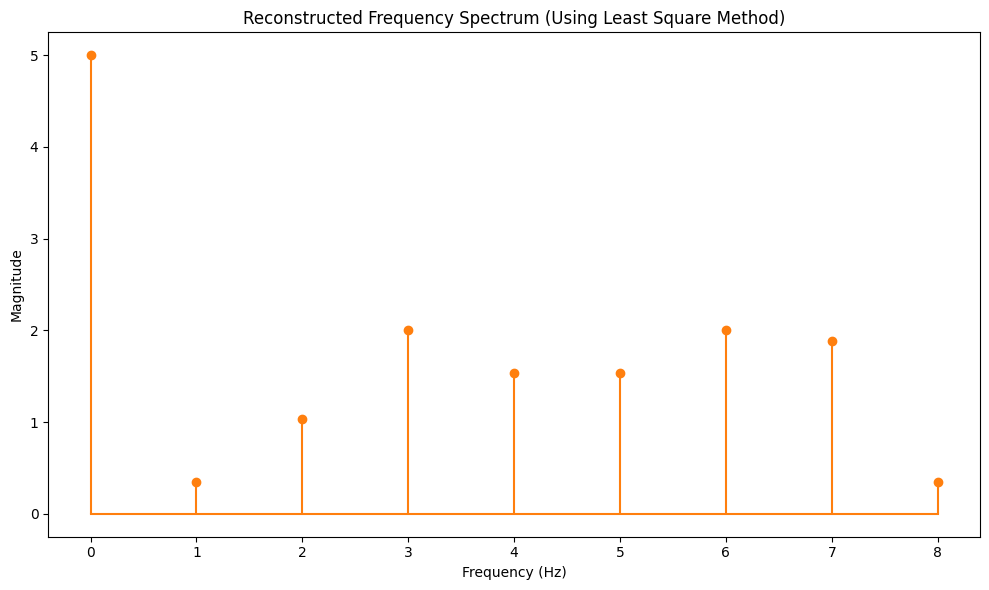

Original Fourier Coefficients: [ 5.        +0.j          0.26604444-0.22323779j  0.        +0.j
 -1.        -1.73205081j -1.43969262-0.52400526j -1.43969262+0.52400526j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
fourier_coefficients_noerror = np.array([5.+0.j, 0.26604444-0.22323779j, -0.32635182+1.85083316j, -1.-1.73205081j, -1.43969262-0.52400526j, -1.43969262+0.52400526j, -1.+1.73205081j, -0.32635182-1.85083316j, 0.26604444+0.22323779j])
# Given Fourier coefficients (with a missing coefficient at position 2)
fourier_coefficients = np.array([5+0.j, 0.26604444-0.22323779j, 0+0j, -1.-1.73205081j, -1.43969262-0.52400526j, -1.43969262+0.52400526j, -1.+1.73205081j, -0.32635182-1.85083316j, 0.26604444+0.22323779j])

print (fourier_coefficients)

# Define the function for linear regression (straight line)
def linear_function(x, a, b):
    return a * x + b

# Frequencies corresponding to the coefficients
frequencies = np.arange(len(fourier_coefficients))

# Identify the position of the missing coefficient
missing_index = np.where(fourier_coefficients == 0+0j)[0][0]


# Separate the real and imaginary parts of the known coefficients
known_indices = np.arange(len(fourier_coefficients))
known_indices = np.delete(known_indices, missing_index)
t = np.delete(fourier_coefficients, missing_index)
# update = np. array(np.delete(fourier_coefficients, missing_index))
known_real = np.real(np.array(t))
known_imag = np.imag(t)
known_frequencies = np.delete(frequencies, missing_index)

# print("I am", known_real)
# print("I am", known_imag)

# Perform the least squares fitting for real and imaginary parts separately
fit_params_real, _ = curve_fit(linear_function, known_frequencies, known_real)
fit_params_imag, _ = curve_fit(linear_function, known_frequencies, known_imag)

# Estimate the missing coefficient using the fitted function for both real and imaginary parts
estimated_real = linear_function(missing_index, *fit_params_real)
estimated_imag = linear_function(missing_index, *fit_params_imag)

reconstructed_coefficients=fourier_coefficients.copy()
# Update the Fourier coefficients with the estimated complex value
estimated_coefficient = estimated_real + 1j * estimated_imag
reconstructed_coefficients[missing_index] = estimated_coefficient

plt.figure(figsize=(10, 6))

# plt.subplot(2, 1, 1)
plt.stem(np.abs(fourier_coefficients_noerror), markerfmt="C0o", linefmt="C0-", basefmt="C0-")
plt.stem(np.abs(fourier_coefficients), markerfmt="C1x", linefmt="C1--", basefmt="C1-")
plt.legend(["Original Spectrum", "Spectrum with Missing Component"])
plt.title("Original and Corrupted Frequency Spectrums")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")


plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
plt.stem(np.abs(reconstructed_coefficients), markerfmt="C1o", linefmt="C1-", basefmt="C1-")
plt.title("Reconstructed Frequency Spectrum (Using Least Square Method)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")


plt.tight_layout()
plt.show()

print("Original Fourier Coefficients:", fourier_coefficients)